In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import geopandas as gpd

path_data = 'peidong_data/'
path_save = 'peidong_output/'

df= pd.read_csv('nobel prize.csv')
df.dropna(subset=['Birth Country'],inplace=True)

In [2]:
df['Birth Country'] = df['Birth Country'].replace({
    "Germany (Poland)" : 'Poland',
    "Prussia (Germany)" : 'Germany',
    "Prussia (Poland)" : 'Poland',
    "Russian Empire (Poland)" : 'Poland',
    'British Mandate of Palestine (Israel)' : 'Israel',
    'West Germany (Germany)' : 'Germany',
    'Austria-Hungary (Czech Republic)' :'Czechia',
    'Union of Soviet Socialist Republics (Russia)':'Russia',
    'India (Pakistan)':'Pakistan',
    'French Algeria (Algeria)': 'Algeria',
    'Austria-Hungary (Hungary)': 'Hungary',
    'Germany (Russia)': 'Russia',
    'Germany (France)':'France',
    'Russian Empire (Finland)': 'Finland',
    'Russian Empire (Russia)':'Russia',
    'Russian Empire (Ukraine)':'Ukraine',
    'Austrian Empire (Austria)':'Austria',
    'Korea (South Korea)':'South Korea',
    'Austria-Hungary (Austria)': 'Austria',
    'Russian Empire (Belarus)':'Belarus',
    'Schleswig (Germany)':'Germany',
    'Russian Empire (Lithuania)': 'Lithuania',
    'Austria-Hungary (Poland)':'Poland',
    'Austria-Hungary (Slovenia)':'Slovenia',
    'Java, Dutch East Indies (Indonesia)': 'Indonesia',
    'Austrian Empire (Italy)': 'Italy',
    'Czechoslovakia (Czech Republic)':'Czechia',
    'Hungary (Slovakia)': 'Slovakia',
    'Austrian Empire (Czech Republic)': 'Czechia',
    'Austria-Hungary (Bosnia and Herzegovina)': 'Bosnia and Herzegovina',
    'British India (Bangladesh)': 'Bangladesh',
    'East Friesland (Germany)':'Germany',
    'Poland (Ukraine)':'Ukraine',
    'Prussia (Russia)': 'Russia',
    'British Protectorate of Palestine (Israel)':'Israel',
    'Poland (Belarus)':'Belarus',
    "Tibet (People's Republic of China)": "China",
    'German-occupied Poland (Poland)': 'Poland',
    'Russian Empire (Azerbaijan)': 'Azerbaijan',
    'Bavaria (Germany)': 'Germany',
    'Southern Rhodesia (Zimbabwe)': 'Zimbabwe',
    'Persia (Iran)': 'Iran',
    'Ottoman Empire (Republic of Macedonia)': 'Republic of Macedonia',
    'Russian Empire (Latvia)':'Latvia',
    'British West Indies (Saint Lucia)': 'Saint Lucia',
    'Faroe Islands (Denmark)': 'Denmark',
    'Gold Coast (Ghana)': 'Ghana',
    'Austria-Hungary (Ukraine)': 'Ukraine',
    'Bosnia (Bosnia and Herzegovina)': 'Bosnia and Herzegovina',
    'W&uuml;rttemberg (Germany)': 'Germany',
    'Crete (Greece)': 'Greece',
    'British India (India)': 'India',
    'Austria-Hungary (Croatia)': 'Croatia',
    'Burma (Myanmar)': 'Myanmar',
    'Hesse-Kassel (Germany)': 'Germany',
    'Mecklenburg (Germany)': 'Germany',
    'Union of Soviet Socialist Republics (Belarus)': 'Belarus',
    'Tuscany (Italy)': 'Italy',
    "Poland (Lithuania)": 'Lithuania',
    "Free City of Danzig (Poland)": 'Poland',
    "Ottoman Empire (Turkey)": 'Turkey',
    "Scotland":"United Kingdom",
    "Northern Ireland":"United Kingdom"
})

country = df['Birth Country'].value_counts();
x_list = [] ; y_list = [];
j = 0;
for i in country.index:
    x_list.append(i)
    selectTemp = df[df['Birth Country'] == i]
    y_list.append(selectTemp['Birth Country'].count())
    j += 1
    if j == 9:
        break

In [3]:
df_contry = pd.DataFrame(country)
df_contry.rename(columns={"Birth Country":'counts'},inplace=True)
df_contry.head()
df_contry.to_csv(path_data+'df_contry.csv')
df_contry['counts'].sum()

943

In [4]:
# map package might not cover some countries listed in the nobel prize data
shapefile = 'peidong_data/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

gdf['counts'] = gdf['country']
for index,row in gdf.iterrows():
    name = gdf.loc[index,'country']
    
    try: 
        grab = df_contry.loc[name]
        gdf.loc[index,'counts']=grab['counts']
    except (KeyError):
        gdf.loc[index,'counts']=0
#     if gdf.loc[index,'counts'] == 0:
#         gdf.loc[index,'counts']= np.NaN
    
gdf['counts'].sum()
gdf = gdf[(gdf.country != "Antarctica") & (gdf.country != "Fr. S. Antarctic Lands")]

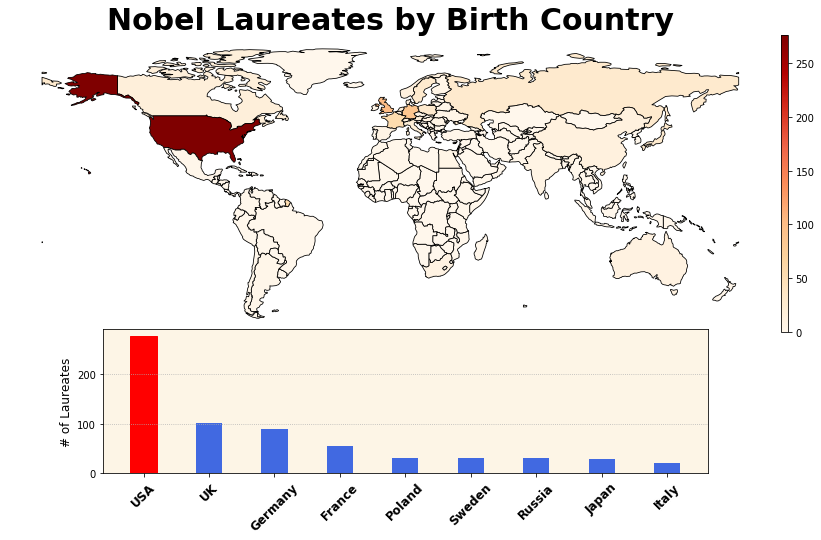

In [5]:
variable = 'counts'
# set the range for the choropleth values
fig, ax = plt.subplots(1, figsize=(14, 10))
ax.set_title('Nobel Laureates by Birth Country', fontsize=30,fontweight='semibold',family='sans-serif')
vmin, vmax = gdf['counts'].min(), gdf['counts'].max()
sm = plt.cm.ScalarMappable(cmap='RdYlBu_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1)

cmap = plt.cm.OrRd
gdf.plot(column=variable, cmap=cmap, linewidth=0.8, edgecolor='black', 
         ax=ax,legend=True, cax=cax)
ax.axis('off');

left, bottom, width, height = [0.22, 0.1, 0.6, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

barlist = ax2.bar(x_list, y_list, color='royalblue', align="center",width = 0.4)
barlist[0].set_color('red')

ax2.set_ylabel("# of Laureates",fontsize=12);
x_list[0] = 'USA'
x_list[1] = 'UK'
ax2.set_xticklabels(x_list,rotation=45,fontsize=12,fontweight='semibold');
ax2.set_yticks(np.arange(0,300,100));
ax2.set_facecolor('oldlace')
ax2.grid(axis='y',linestyle=":")
plt.savefig(path_save+'01.png', dpi=300,bbox_inches='tight')

## Get GDP Data

In [6]:
# years = np.arange(1960,2017,1)
# US_GDP = [];        
# GDP_years = []

# url_usa = 'http://api.worldbank.org/v2/country/usa/indicator/NY.GDP.MKTP.CD?format=json&date='
# for i in years:
#     try:
#         url_usa_query = url_usa + str(i)
        
#         response = requests.get(url_usa_query).json()
#         gdp = (response[1][0]['value'])/1e12
#         US_GDP.append(gdp) # unit: Trillion Dollar
        
#         GDP_years.append(i)
        
#     except (KeyError):
#         print(i)
        
# df_GDP_usa = pd.DataFrame({
#     "Year":GDP_years,
#     "USA GDP": US_GDP
# })
# df_GDP_usa.to_csv('df_GDP_usa.csv',index=False, header=True)

In [7]:
# years = np.arange(1960,2017,1)
# WLD_GDP = [];     
# GDP_years = []

# url_wld = 'http://api.worldbank.org/v2/country/WLD/indicator/NY.GDP.MKTP.CD?format=json&date='

# for i in years:
#     try:
#         url_wld_query = url_wld + str(i)
        
#         response = requests.get(url_wld_query).json()
#         gdp = (response[1][0]['value'])/1e12
#         WLD_GDP.append(gdp) # unit: Trillion Dollar
        
#         GDP_years.append(i)
        
#     except (KeyError):
#         print(i)

# df_GDP_wld = pd.DataFrame({
#     "Year":GDP_years,
#     "World GDP": WLD_GDP
# })
# df_GDP_wld.to_csv('df_GDP_wld.csv',index=False, header=True)

In [8]:


df_GDP_usa = pd.read_csv(path_data+'df_GDP_usa.csv')
df_GDP_wld = pd.read_csv(path_data+'df_GDP_wld.csv')

df_GDP = pd.merge(df_GDP_usa,df_GDP_wld, on = 'Year',how='inner')

In [9]:
df_GDP['% in World GDP'] = round(df_GDP['USA GDP']/df_GDP['World GDP']*100,2)
df_GDP.head()

,Year,USA GDP,World GDP,% in World GDP
0,1960,0.5433,1.370412,39.65
1,1961,0.5633,1.425639,39.51
2,1962,0.6051,1.529897,39.55
3,1963,0.6386,1.648115,38.75
4,1964,0.6858,1.805479,37.98


In [10]:
df_GDP['Cum. Laureates'] = df_GDP['Year'] 

for index,row in df_GDP.iterrows():
    target = df_GDP.loc[index,'Year']
    num = len(df[(df['Birth Country']=='United States of America')&
                 (df['Year']<=target)]['Full Name'].unique())
    df_GDP.loc[index,'Cum. Laureates'] = num


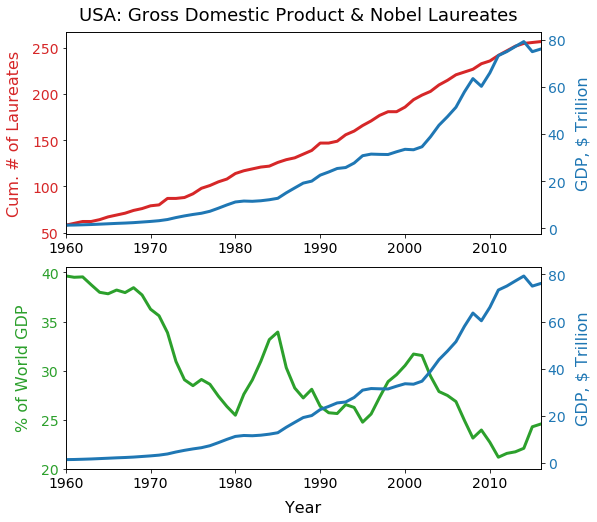

In [11]:
fig = plt.figure(figsize=(7*1.2,7))

fig.suptitle('USA: Gross Domestic Product & Nobel Laureates',fontsize=18,y=1.03)
ax1 = fig.add_subplot(211); 
color = 'tab:red'
ax1.plot(df_GDP['Year'],df_GDP['Cum. Laureates'],color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('Cum. # of Laureates', color=color,fontsize=16,labelpad=10)  
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(df_GDP['Year'],df_GDP['World GDP'],color=color,linewidth=3)
ax2.set_ylabel('GDP, $ Trillion', color=color,fontsize=16,labelpad=10)  
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(1960,2016);
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

ax1 = fig.add_subplot(212); 
color = 'tab:green'
ax1.set_xlabel('Year',fontsize=16,labelpad=10)  
ax1.plot(df_GDP['Year'],df_GDP['% in World GDP'],color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('% of World GDP', color=color,fontsize=16,labelpad=10)  
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.plot(df_GDP['Year'],df_GDP['World GDP'],color=color,linewidth=3)
ax2.set_ylabel('GDP, $ Trillion', color=color,fontsize=16,labelpad=10)  
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlim(1960,2016);
ax1.set_yticks(np.arange(20,41,5));
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
plt.tight_layout(); 

plt.savefig(path_save+'02.png', dpi=300,bbox_inches='tight')

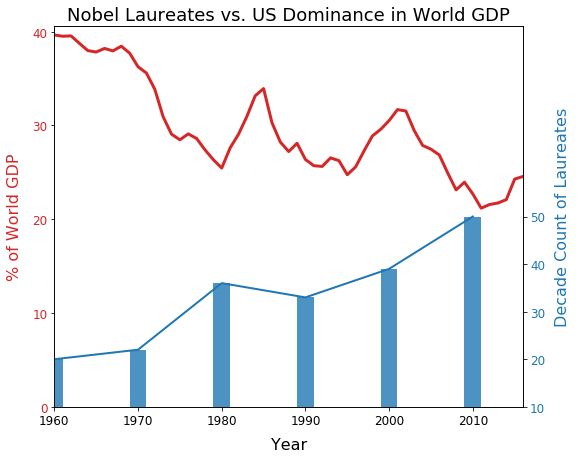

In [12]:
fig, ax1 = plt.subplots(figsize=(7*1.2,7))
ax1.set_title('Nobel Laureates vs. US Dominance in World GDP',fontsize=18)
color = 'tab:red'
ax1.plot(df_GDP['Year'],df_GDP['% in World GDP'],color=color,linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlabel('Year',fontsize=16,labelpad=10)  
ax1.set_ylabel('% of World GDP', color=color,fontsize=16,labelpad=10)  

ax2 = ax1.twinx()  
color = 'tab:blue'

years = np.arange(1960,2011,10)
tenYearCounts = []
for i in years:
    c = len(df[(df['Birth Country']=='United States of America')&
               (df['Year'] > (i-10))&
               (df['Year'] <= i)
              ]['Full Name'].unique())
    tenYearCounts.append(c)

ax2.bar(years,tenYearCounts,color=color,width=2,alpha=0.8)
ax2.plot(years,tenYearCounts,color=color,linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Decade Count of Laureates', color=color,fontsize=16,labelpad=10)  

ax2.set_xlim(1960,2016);
ax1.set_yticks(np.arange(0,41,10));
ax2.set_yticks(np.arange(10,51,10));
ax2.set_ylim(10,90)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
plt.savefig(path_save+'03.png', dpi=300,bbox_inches='tight')

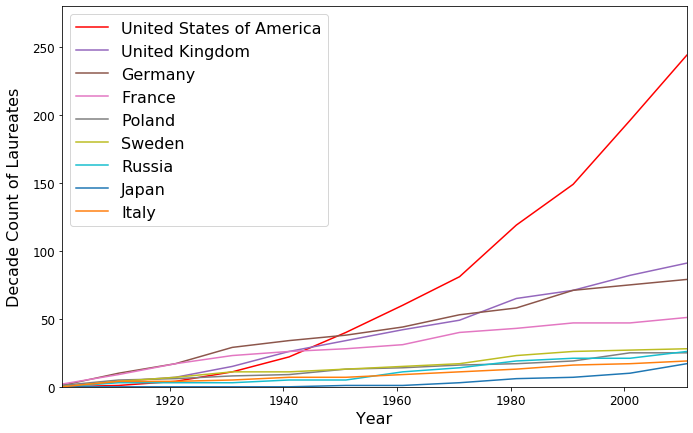

In [13]:
name = ['United States of America', 'United Kingdom','Germany', 'France','Poland', 'Sweden', 'Russia', 'Japan', 'Italy']

plt.figure(figsize=(7*1.6,7))
k=4;
for i in name:
    df_t = df[df['Birth Country'] == i];
    
    years = np.arange(1901,2012,10)
    tenYearCounts = []
    c = 0
    
    for j in years:
        c += len(df_t[(df_t['Birth Country']==i)&(df_t['Year'] > (j-10))&(df_t['Year'] <= j)]['Full Name'].unique())
        tenYearCounts.append(c)
        
    if i == 'United States of America':
        DC = 'red'
    else:
        DC = 'C'+str(k)
        k += 1
    plt.plot(years,tenYearCounts,color =DC, label = i)
    
plt.xlim(1901,2011);
plt.tick_params(labelsize=12)
plt.tick_params(labelsize=12)   
plt.xlabel('Year',fontsize=16)
plt.ylabel('Decade Count of Laureates', fontsize=16,labelpad=10);
plt.legend(fontsize=16)
plt.ylim(0,280)
plt.savefig(path_save+'04.png', dpi=300,bbox_inches='tight')